In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR,ARResults

df = pd.read_csv('tempandq.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

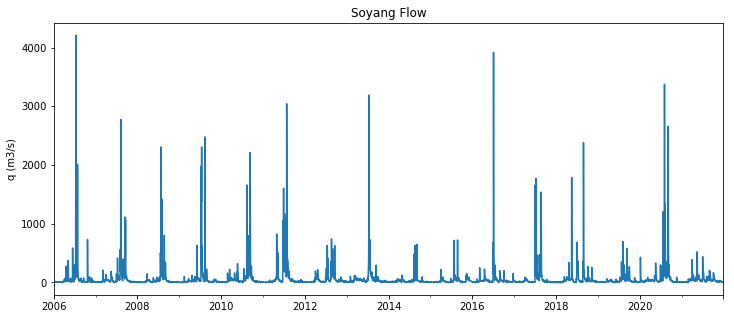

In [2]:
title='Soyang Flow'
ylabel='q (m3/s)'
xlabel='' # we don't really need a label here

ax = df['q'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [3]:
len(df)

5844

In [4]:
train = df.iloc[:4383] #2006-2017 -0.75*5844
test = df.iloc[4383:] #2018-2021

In [6]:
test

,temp,q
date,,
2018-01-01,-5.9,2.703
2018-01-02,-4.2,2.793
2018-01-03,-7.5,2.894
2018-01-04,-6.4,0.000
2018-01-05,-4.5,0.000
2018-01-06,-6.8,8.841
2018-01-07,-4.4,3.292
2018-01-08,0.4,0.000
2018-01-09,-4.9,3.462


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
model = AR(train['q'])
AR31fit = model.fit(maxlag=31)
AR31fit.aic
print(f'Lag: {AR31fit.k_ar}')
print(f'Coefficients:\n{AR31fit.params}')


Lag: 28
Coefficients:
const    12.121149
L1.q      0.739515
L2.q     -0.193623
L3.q      0.225285
L4.q     -0.123418
L5.q      0.100006
L6.q     -0.073163
L7.q      0.017171
L8.q      0.012334
L9.q      0.021965
L10.q     0.017810
L11.q    -0.019190
L12.q     0.082743
L13.q    -0.015778
L14.q    -0.017824
L15.q     0.025195
L16.q    -0.019192
L17.q    -0.020496
L18.q     0.033263
L19.q    -0.010576
L20.q     0.005797
L21.q    -0.023122
L22.q    -0.001225
L23.q     0.002178
L24.q     0.013392
L25.q    -0.031864
L26.q     0.012898
L27.q     0.005920
L28.q     0.052028
dtype: float64


In [19]:
start=len(train)
end=len(train)+len(test)-1

predictions31 = AR31fit.predict(start=start, end=end, dynamic=False).rename('AR(31) Predictions')

In [20]:
predictions31

2018-01-01    12.587345
2018-01-02    22.283497
2018-01-03    27.499374
2018-01-04    31.338462
2018-01-05    33.886647
2018-01-06    36.593463
2018-01-07    38.349800
2018-01-08    38.836020
2018-01-09    38.953373
2018-01-10    39.871186
2018-01-11    41.807937
2018-01-12    42.076802
2018-01-13    43.240251
2018-01-14    44.917418
2018-01-15    45.878183
2018-01-16    47.649530
2018-01-17    48.728647
2018-01-18    48.739494
2018-01-19    49.662835
2018-01-20    50.307195
2018-01-21    51.297580
2018-01-22    51.684533
2018-01-23    51.498387
2018-01-24    51.205796
2018-01-25    51.449784
2018-01-26    51.776213
2018-01-27    51.724244
2018-01-28    51.556945
2018-01-29    52.303389
2018-01-30    53.353376
                ...    
2021-12-02    66.609910
2021-12-03    66.609910
2021-12-04    66.609910
2021-12-05    66.609910
2021-12-06    66.609910
2021-12-07    66.609910
2021-12-08    66.609910
2021-12-09    66.609910
2021-12-10    66.609910
2021-12-11    66.609910
2021-12-12    66

In [21]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['q'][i]}")

NameError: name 'predictions1' is not defined

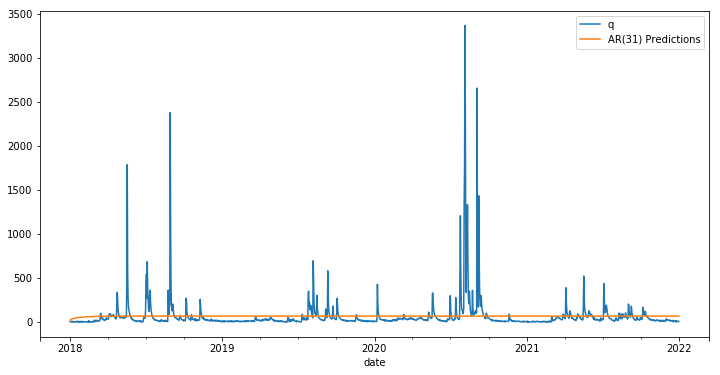

In [22]:
test['q'].plot(legend=True)
predictions31.plot(legend=True,figsize=(12,6));

In [12]:
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const    21.175174
L1.q      0.725030
L2.q     -0.045045
dtype: float64


In [13]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

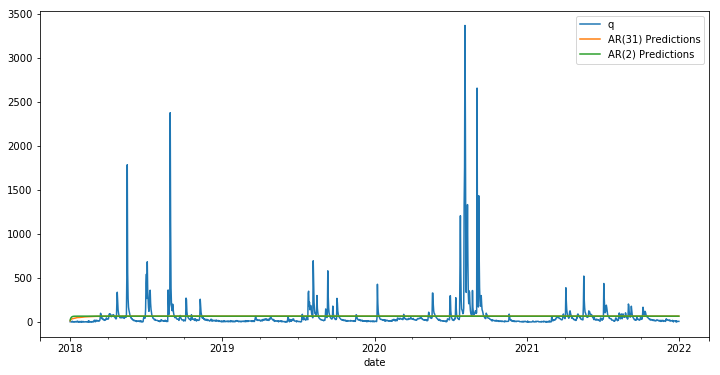

In [15]:
test['q'].plot(legend=True)
predictions31.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [16]:
ARfit=model.fit(ic='t-stat')

In [17]:
ARfit.params

const    12.121149
L1.q      0.739515
L2.q     -0.193623
L3.q      0.225285
L4.q     -0.123418
L5.q      0.100006
L6.q     -0.073163
L7.q      0.017171
L8.q      0.012334
L9.q      0.021965
L10.q     0.017810
L11.q    -0.019190
L12.q     0.082743
L13.q    -0.015778
L14.q    -0.017824
L15.q     0.025195
L16.q    -0.019192
L17.q    -0.020496
L18.q     0.033263
L19.q    -0.010576
L20.q     0.005797
L21.q    -0.023122
L22.q    -0.001225
L23.q     0.002178
L24.q     0.013392
L25.q    -0.031864
L26.q     0.012898
L27.q     0.005920
L28.q     0.052028
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error

labels = ['AR(2)','AR(31)']
preds = [predictions2, predictions31]  # these are variables, not strings!

for i in range(2):
    error = mean_squared_error(test['q'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(2) Error: 36337.71971
AR(31) Error: 36282.50376


In [29]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC:   10.1
AR(2) AIC:   10.1
AR(11) AIC: 10.114


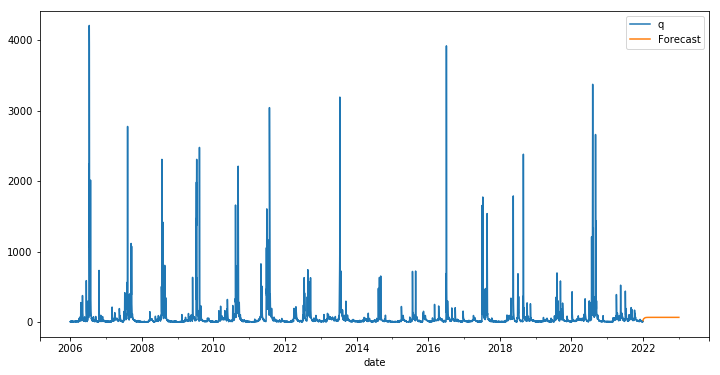

In [25]:
# First, retrain the model on the full dataset
model = AR(df['q'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+365, dynamic=False).rename('Forecast')

# Plot the results
df['q'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));